# Curso de Regresión lineal con scikit-learn

Notas del curso impartido por Luis Lari en la plataforma de Platzi.

Es recomendable tener conocimientos en:
- Matemáticas para inteligencia artificial
- Análisis exploratorio de datos con Python y Pandas
- Visualización de datos con Matplotlib y Seaborn
- Fundamentos de Inteligencia artificial

¡Empezamos!

## Tu primera regresión lineal con scikit-learn

Empezando con la librería de seaborn, esta nos permite dar contexto y estilos a nuestras gráficas, además de que contiene una serie de gráficos que nos ayuda a entender nuestras variables.

In [ ]:
#import seaborn as sns
#
#sns.set(style='whitedrid', context='notebook')
#sns.pairplot(df[cols], height=2.5)
#sns.heatmap(cm, cbar=True,
#    annot= True,
#    square=True,
#    fmt='.2f',
#    annot_kws={'size':15},
#    yticklabels=cols,
#    xticklabels=cols)

En este notebook estaremos viendo qué es una regresión lineal y cómo funciona con un ejemplo en Python. Para esto, lo primero que tendremos que hacer es descargar los datos y comprender qué contienen.

### Importando datos

In [ ]:
import pandas as pd

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
df = pd.read_csv(url, header=None, delimiter='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Análisis de datos para tu primera regresión lineal

Una vez descargados los datos, hay que entenderlos. Es importante saber que el algoritmo de regresión lineal se basa altamente en correlaciones por lo que recomiendo que empecemos viendo un gráfico de correlaciones usando **[pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)** de ***Seaborn***.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

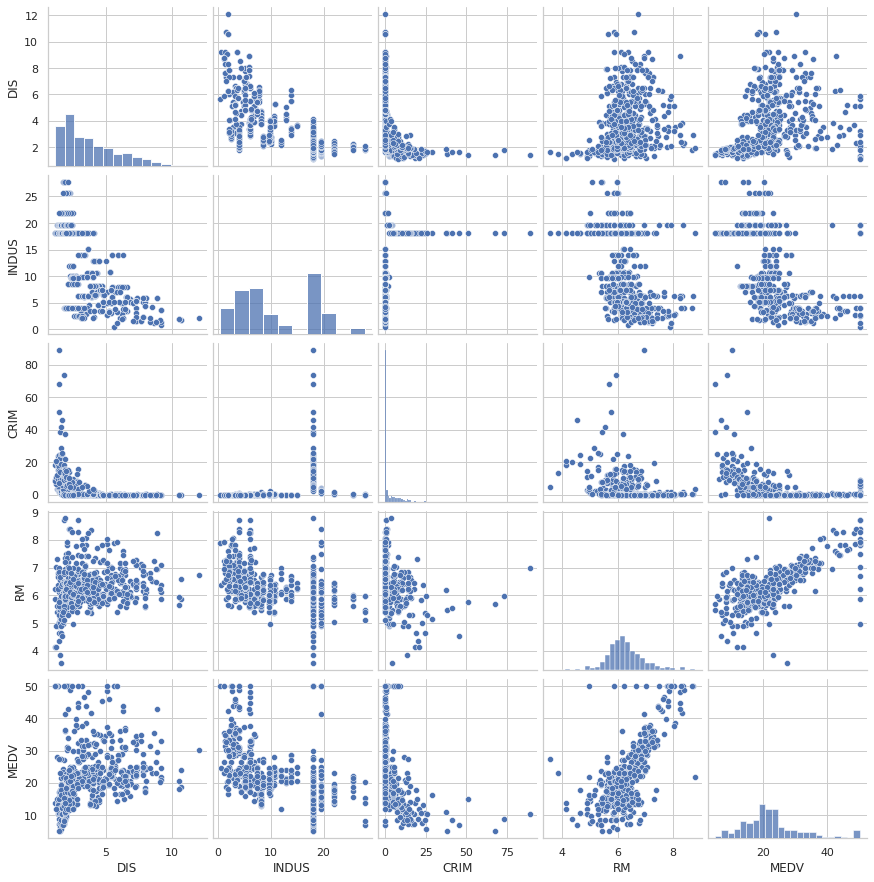

In [ ]:
# Se seleccionan las columnas más interesantes a analizar
cols = ['DIS', 'INDUS', 'CRIM', 'RM', 'MEDV']

# Graficando
sns.set(style='whitegrid', context='notebook')
sns.pairplot(df[cols], height=2.5)
plt.show()

Como MEDV (valor promedio de las casas) es la variable que se quiere predecir, se busca una variable que tenga relación con esta. Por ejemplo, podemos observar que a medida que RM (numero promedio de habitaciones por vivienda) aumenta, MEDV también lo hace. Sin embargo, esto es solo un análisis visual, por lo que es necesario medirlo mediante una matriz de correlación.

In [ ]:
import numpy as np

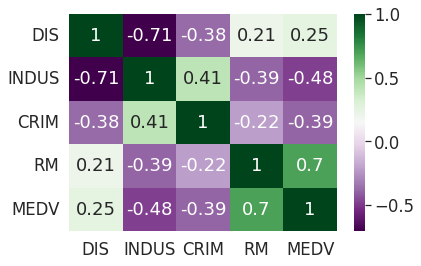

In [ ]:
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
sns.heatmap(cm, cbar=True, annot=True, yticklabels=cols, xticklabels=cols, cmap='PRGn');

## Entrenando un modelo de regresión lineal con scikit-learn

Un modelo de regresión lineal utiliza puntos reales los cuales se ajustan a una línea recta para poder hacer predicciones sobre ellos. Es decir, si se tienen muchos puntos dispersados en el plano cartesiano se traza una línea recta para poder entenderlos.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [ ]:
# La variable X es con la que se va a tratar de predecir la variable Y
X = df['RM'].values.reshape(-1,1)
y = df['MEDV'].values.reshape(-1,1)

sc_x = StandardScaler()
sc_y = StandardScaler()

X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)

slr = LinearRegression()
slr.fit(X_std, y_std)

print(f'''
Valores reales
df['RM'].values: {df['RM'].values}

===================
Valores reales con reshape
X: {X}

====================
Utilizando un escalamiento
sc_x: {sc_x}

====================
Utilizando un fit_transform
X_std = {X_std}
''')



Valores reales
df['RM'].values: [6.575 6.421 7.185 6.998 7.147 6.43  6.012 6.172 5.631 6.004 6.377 6.009
 5.889 5.949 6.096 5.834 5.935 5.99  5.456 5.727 5.57  5.965 6.142 5.813
 5.924 5.599 5.813 6.047 6.495 6.674 5.713 6.072 5.95  5.701 6.096 5.933
 5.841 5.85  5.966 6.595 7.024 6.77  6.169 6.211 6.069 5.682 5.786 6.03
 5.399 5.602 5.963 6.115 6.511 5.998 5.888 7.249 6.383 6.816 6.145 5.927
 5.741 5.966 6.456 6.762 7.104 6.29  5.787 5.878 5.594 5.885 6.417 5.961
 6.065 6.245 6.273 6.286 6.279 6.14  6.232 5.874 6.727 6.619 6.302 6.167
 6.389 6.63  6.015 6.121 7.007 7.079 6.417 6.405 6.442 6.211 6.249 6.625
 6.163 8.069 7.82  7.416 6.727 6.781 6.405 6.137 6.167 5.851 5.836 6.127
 6.474 6.229 6.195 6.715 5.913 6.092 6.254 5.928 6.176 6.021 5.872 5.731
 5.87  6.004 5.961 5.856 5.879 5.986 5.613 5.693 6.431 5.637 6.458 6.326
 6.372 5.822 5.757 6.335 5.942 6.454 5.857 6.151 6.174 5.019 5.403 5.468
 4.903 6.13  5.628 4.926 5.186 5.597 6.122 5.404 5.012 5.709 6.129 6.152
 5.272 6.943 6.066 

### Análisis de resultados

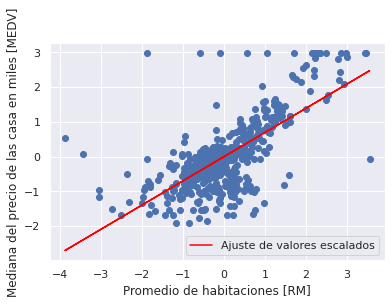

In [ ]:
sns.set(font_scale=1.0)

plt.scatter(X_std, y_std)
plt.plot(X_std, slr.predict(X_std), color='red', label='Ajuste de valores escalados')
plt.ylabel("Mediana del precio de las casa en miles [MEDV]")
plt.xlabel("Promedio de habitaciones [RM]")
plt.legend()

### Generando predicción con el modelo

En este ejemplo, queremos saber el precio promedio de una casa con 5 habitaciones

In [ ]:
n_rooms = 5
n_rooms_std = sc_x.transform(np.array([n_rooms]).reshape(-1,1))

std_prediction = slr.predict(n_rooms_std)
price = sc_y.inverse_transform(std_prediction)
print("El precio promedio de una cada con 5 habitaciones es de", price)

El precio promedio de una cada con 5 habitaciones es de [[10.83992413]]


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8b8beb45-6e9e-4db8-96c9-28634efc9b59' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>